# <center> Panorama de l’état de la malnutrition dans le monde (Année 2017)

## <span style="color : #00BFFF">***Les librairies***</span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## <span style="color : #00BFFF">***Fichier population.csv***</span>

* ### <span style="color : #20B2AA">***Nettoyage et préparation des fichiers***</span>

In [2]:
population_df = pd.read_csv('population.csv', index_col ='Zone')
population_df['Valeur'] = pd.to_numeric(population_df['Valeur'], errors='coerce')
population_df = population_df.fillna(value={'Valeur': 0})
population_df['Valeur'] = population_df['Valeur']*1000

* ### <span style="color : #20B2AA">***Correction des noms de colonnes***</span>

In [3]:
population_df.index.name="Pays"
population_df = population_df.rename(columns={'Valeur':'Habitants'})

* ### <span style="color : #20B2AA">***Filtre (population_df) pour l'Année 2017***</span>

In [4]:
population_2017_df = population_df[population_df['Année'] == 2017]
population_2017_df

,Année,Habitants
Pays,,
Afghanistan,2017,36296113.0
Afrique du Sud,2017,57009756.0
Albanie,2017,2884169.0
Algérie,2017,41389189.0
Allemagne,2017,82658409.0
...,...,...
Venezuela (République bolivarienne du),2017,29402484.0
Viet Nam,2017,94600648.0
Yémen,2017,27834819.0


## <span style="color : #00BFFF">***Fichier sous_nutrition.csv***</span>

* ### <span style="color : #20B2AA">***Nettoyage et préparation des fichiers***</span>

In [5]:
sous_nutrition_df = pd.read_csv('sous_nutrition.csv', index_col ='Zone')
sous_nutrition_df['Valeur'] = pd.to_numeric(sous_nutrition_df['Valeur'], errors='coerce')
sous_nutrition_df = sous_nutrition_df.fillna(value={'Valeur': 0})
sous_nutrition_df['Valeur'] = sous_nutrition_df['Valeur']*1000000
sous_nutrition_df['Année'] = sous_nutrition_df['Année'].replace({'2012-2014': 2013, '2013-2015': 2014, '2014-2016': 2015, '2015-2017': 2016, '2016-2018': 2017, '2017-2019': 2018})

* ### <span style="color : #20B2AA">***Correction des noms de colonnes***</span>

In [6]:
sous_nutrition_df.index.name="Pays"
sous_nutrition_df = sous_nutrition_df.rename(columns={'Valeur':'Habitants'})

* ### <span style="color : #20B2AA">***Filtre (sous_nutrition_df) pour l'Année 2017***</span>

In [7]:
sous_nutrition_2017_df = sous_nutrition_df[sous_nutrition_df['Année'] == 2017]
sous_nutrition_2017_df

,Année,Habitants
Pays,,
Afghanistan,2017,10500000.0
Afrique du Sud,2017,3100000.0
Albanie,2017,100000.0
Algérie,2017,1300000.0
Allemagne,2017,0.0
...,...,...
Venezuela (République bolivarienne du),2017,8000000.0
Viet Nam,2017,6500000.0
Yémen,2017,0.0


## <span style="color : #00BFFF">***Fichier dispo_alimentaire.csv***</span>

* ### <span style="color : #20B2AA">***Nettoyage et préparation des fichiers***</span>

In [8]:
dispo_alimentaire_df = pd.read_csv('dispo_alimentaire.csv', index_col ='Zone')
dispo_alimentaire_df = dispo_alimentaire_df.fillna(value={'Aliments pour animaux' : 0, 'Autres Utilisations' : 0, 'Disponibilité alimentaire (Kcal/personne/jour)': 0, 'Disponibilité alimentaire en quantité (kg/personne/an)' : 0, 'Disponibilité de matière grasse en quantité (g/personne/jour)' : 0, 'Disponibilité de protéines en quantité (g/personne/jour)' : 0, 'Disponibilité intérieure' : 0, 'Exportations - Quantité' : 0, 'Importations - Quantité' : 0, 'Nourriture' : 0, 'Pertes' : 0, 'Production' : 0, 'Semences' : 0, 'Traitement' : 0, 'Variation de stock' : 0 })

* ### <span style="color : #20B2AA">***Correction des noms de colonnes***</span>

In [9]:
dispo_alimentaire_df.index.name="Pays"
dispo_alimentaire_df = dispo_alimentaire_df.rename(columns={'Exportations - Quantité':'Exportations', 'Importations - Quantité':'Importations'})

* ### <span style="color : #20B2AA">***Correction du nom de certains pays***</span>

In [10]:
dispo_alimentaire_df = dispo_alimentaire_df.rename(index={'Tchéquie (la)':'Tchéquie', 'Royaume-Uni':"Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"})
dispo_alimentaire_df

,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations,Importations,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Pays,,,,,,,,,,,,,,,,,
Afghanistan,Abats Comestible,animale,0.0,0.0,5.0,1.72,0.20,0.77,53.0,0.0,0.0,53.0,0.0,53.0,0.0,0.0,0.0
Afghanistan,"Agrumes, Autres",vegetale,0.0,0.0,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,0.0,0.0,0.0
Afghanistan,Aliments pour enfants,vegetale,0.0,0.0,1.0,0.06,0.01,0.03,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,Ananas,vegetale,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Afghanistan,Bananes,vegetale,0.0,0.0,4.0,2.70,0.02,0.05,82.0,0.0,82.0,82.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Îles Salomon,Viande de Suides,animale,0.0,0.0,45.0,4.70,4.28,1.41,3.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
Îles Salomon,Viande de Volailles,animale,0.0,0.0,11.0,3.34,0.69,1.14,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
Îles Salomon,"Viande, Autre",animale,0.0,0.0,0.0,0.06,0.00,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## <span style="color : #00BFFF">***Fichier aide_alimentaire.csv***</span>

In [11]:
aide_alimentaire_df = pd.read_csv("aide_alimentaire.csv", index_col ="Pays bénéficiaire")
aide_alimentaire_df['Valeur'] = pd.to_numeric(aide_alimentaire_df['Valeur'], errors='coerce', downcast='float')
aide_alimentaire_df = aide_alimentaire_df.fillna(value={"Valeur": 0})

* ### <span style="color : #20B2AA">***Correction des noms de colonnes***</span>

In [12]:
aide_alimentaire_df.index.name="Pays"
aide_alimentaire_df = aide_alimentaire_df.rename(columns={'Valeur':'Quantité donnée'})

* ### <span style="color : #20B2AA">***Correction du nom de certains pays***</span>

In [13]:
aide_alimentaire_df = aide_alimentaire_df.rename(index={'Swaziland':'Eswatini'})

* ### <span style="color : #20B2AA">***Filtre (aide_alimentaire_df) depuis 2013***</span>

In [14]:
aide_alimentaire_depuis_2013_df = aide_alimentaire_df[['Quantité donnée']].groupby(['Pays']).sum()
aide_alimentaire_depuis_2013_df

,Quantité donnée
Pays,
Afghanistan,185452.0
Algérie,81114.0
Angola,5014.0
Bangladesh,348188.0
Bhoutan,2666.0
...,...
Zambie,3026.0
Zimbabwe,62570.0
Égypte,1122.0


# <center><span style="color : #708090">**La proportion de personnes en état de sous-nutrition**</span>

* ### <span style="color : #20B2AA">***Merge entre (population_2017_df) et (sous_nutrition_2017_df)***</span>

In [15]:
merge_population_sousnutrition_df = pd.merge(population_2017_df[['Habitants']], sous_nutrition_2017_df[['Habitants']], on='Pays', suffixes=('_population','_sousnutrition'), how='left')
merge_population_sousnutrition_df = merge_population_sousnutrition_df.fillna(value={'Habitants_sousnutrition': 0})

* ### <span style="color : #20B2AA">***Calcul de la proportion***</span>

In [16]:
proportion_population_sousnutrition = round((merge_population_sousnutrition_df['Habitants_sousnutrition'].sum()/merge_population_sousnutrition_df['Habitants_population'].sum())*100 ,2)
print('La proportion de personnes en état de sous-nutrition Mondial en 2017 est de:', proportion_population_sousnutrition, '%')

La proportion de personnes en état de sous-nutrition Mondial en 2017 est de: 7.1 %


* ### <span style="color : #20B2AA">***Représentation dans un graphique***</span>

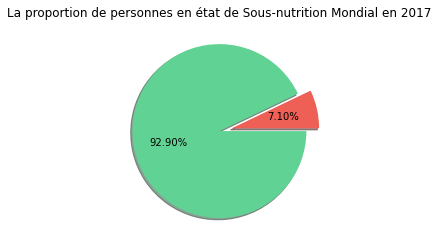

In [17]:
plt.pie(x=[merge_population_sousnutrition_df['Habitants_sousnutrition'].sum(), (merge_population_sousnutrition_df['Habitants_population'].sum() - merge_population_sousnutrition_df['Habitants_sousnutrition'].sum())], colors = ['#EE6055','#60D394'], autopct='%1.2f%%', shadow=True, 
explode = [0.15,0])
plt.title('La proportion de personnes en état de Sous-nutrition Mondial en 2017')
plt.show()

# <center><span style="color : #708090">**Le nombre théorique de personnes qui pourraient être nourries**</span>

* ### <span style="color : #20B2AA">***Regroupement 'Disponibilité alimentaire (Kcal/personne/jour)' par Pays***</span>

In [18]:
dispo_alimentaire_pays_df = dispo_alimentaire_df[['Disponibilité alimentaire (Kcal/personne/jour)']].groupby(['Pays']).sum()

* ### <span style="color : #20B2AA">***Merge entre (population_2017_df) et (dispo_alimentaire_pays_df)***</span>

In [19]:
merge_population_dispo_alimentaire_pays_df = pd.merge(population_2017_df[['Habitants']], dispo_alimentaire_pays_df[['Disponibilité alimentaire (Kcal/personne/jour)']], on='Pays', how='left')
merge_population_dispo_alimentaire_pays_df = merge_population_dispo_alimentaire_pays_df.fillna(value={'Disponibilité alimentaire (Kcal/personne/jour)': 0})

* ### <span style="color : #20B2AA">***En ajoutant une colonne pour le calcul de "Population x Disponibilité Alimentaire (Kcal/personne/jour)"***</span>

In [20]:
merge_population_dispo_alimentaire_pays_df.loc[:,'Disponibilité alimentaire (Kcal/jour)'] = merge_population_dispo_alimentaire_pays_df['Habitants']*merge_population_dispo_alimentaire_pays_df['Disponibilité alimentaire (Kcal/personne/jour)']

* ### <span style="color : #20B2AA">***Disponibilité Alimentaire Mondiale en 2017 par jour***</span>

In [21]:
dispo_alimentaire_mondial_2017 = merge_population_dispo_alimentaire_pays_df['Disponibilité alimentaire (Kcal/jour)'].sum()

* ### <span style="color : #20B2AA">***Calcul de la Disponibilité Alimentaire Mondiale (Kcal/jour) entre Le Kcal nécessaire par jour***</span>

In [22]:
for kcal in [1800, 2500, 2700]:
    population_theorique = round((dispo_alimentaire_mondial_2017*365)/(kcal*365),0)
    pourcentage_population_theorique = round(((population_theorique/population_2017_df['Habitants'].sum())*100),2)
    print ('Le nombre théorique de personnes pour', kcal, 'KCal est de:', f"{population_theorique:,}", 'que représente',pourcentage_population_theorique, '% de la population mondial')

Le nombre théorique de personnes pour 1800 KCal est de: 11,767,868,193.0 que représente 155.9 % de la population mondial
Le nombre théorique de personnes pour 2500 KCal est de: 8,472,865,099.0 que représente 112.25 % de la population mondial
Le nombre théorique de personnes pour 2700 KCal est de: 7,845,245,462.0 que représente 103.94 % de la population mondial


# <center><span style="color : #708090">**Le nombre théorique de personnes qui pourraient être nourries avec des produits végétaux**</span>

* ### <span style="color : #20B2AA">***Filtre (dispo_alimentaire_df) par Origine vegetale***</span>

In [23]:
dispo_alimentaire_vegetale_df = dispo_alimentaire_df.loc[dispo_alimentaire_df['Origine'] == 'vegetale',:]

* ### <span style="color : #20B2AA">***Regroupement 'Disponibilité alimentaire (Kcal/personne/jour) Vegetale' par Pays***</span>

In [24]:
dispo_alimentaire_vegetale_pays_df = dispo_alimentaire_vegetale_df[['Disponibilité alimentaire (Kcal/personne/jour)']].groupby(['Pays']).sum()

* ### <span style="color : #20B2AA">***Merge entre (population_2017_df) et (dispo_alimentaire_vegetale_pays_df)***</span>

In [25]:
merge_population_dispo_alimentaire_vegetale_pays_df = pd.merge(population_2017_df[['Habitants']], dispo_alimentaire_vegetale_pays_df[['Disponibilité alimentaire (Kcal/personne/jour)']], on='Pays', how='left')
merge_population_dispo_alimentaire_vegetale_pays_df = merge_population_dispo_alimentaire_vegetale_pays_df.fillna(value={'Disponibilité alimentaire (Kcal/personne/jour)': 0})

* ### <span style="color : #20B2AA">***En ajoutant une colonne pour le calcul de "Population x Disponibilité Alimentaire (Kcal/personne/jour) vegetale"***</span>

In [26]:
merge_population_dispo_alimentaire_vegetale_pays_df.loc[:,'Disponibilité alimentaire (Kcal/jour)'] = merge_population_dispo_alimentaire_vegetale_pays_df['Habitants']*merge_population_dispo_alimentaire_vegetale_pays_df['Disponibilité alimentaire (Kcal/personne/jour)']

* ### <span style="color : #20B2AA">***Disponibilité Alimentaire Vegetale Mondiale en 2017 par jour***</span>

In [27]:
dispo_alimentaire_vegetale_mondial_2017 = merge_population_dispo_alimentaire_vegetale_pays_df['Disponibilité alimentaire (Kcal/jour)'].sum()

* ### <span style="color : #20B2AA">***Calcul de la Disponibilité Alimentaire Vegetale Mondiale (Kcal/jour) entre Le Kcal nécessaire par jour***</span>

In [28]:
for kcal in [1800, 2500, 2700]:
    population_theorique_vegetale = round((dispo_alimentaire_vegetale_mondial_2017*365)/(kcal*365),0)
    pourcentage_population_theorique_vegetale = round(((population_theorique_vegetale/population_2017_df['Habitants'].sum())*100),2)
    print ('Le nombre théorique de personnes pour', kcal, 'KCal est de:', f"{population_theorique_vegetale:,}", 'que représente',pourcentage_population_theorique_vegetale, '% de la population mondial')

Le nombre théorique de personnes pour 1800 KCal est de: 9,694,171,899.0 que représente 128.43 % de la population mondial
Le nombre théorique de personnes pour 2500 KCal est de: 6,979,803,768.0 que représente 92.47 % de la population mondial
Le nombre théorique de personnes pour 2700 KCal est de: 6,462,781,266.0 que représente 85.62 % de la population mondial


# <center><span style="color : #708090">**L’utilisation de la disponibilité intérieure, par rapport à l’alimentation animale, celle qui est perdue et celle qui est concrètement utilisée pour l'alimentation humaine**</span>

### <span style="color : #000000">***Les 10 variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire***</span>

- <span style="color : #1E90FF">**Disponibilité intérieure = Production + Importations + Variation de stock - Exportations**</span>

- <span style="color : #1E90FF">**Disponibilité intérieure = Nourriture + Pertes + Semences + Aliments pour animaux + Traitement + Autres Utilisations**</span>

* ### <span style="color : #20B2AA">***Regroupement les 10 variables de Disponibilité intérieure par Pays***</span>

In [29]:
disponibilité_intérieure_df = dispo_alimentaire_df[['Production','Importations','Variation de stock','Exportations','Disponibilité intérieure','Nourriture','Pertes','Semences','Aliments pour animaux','Traitement','Autres Utilisations']].groupby(['Pays']).sum()

* ### <span style="color : #20B2AA">***Calcul de la Proportion de las variables par rapport a la disponibilité intérieure***</span>

In [30]:
for element in ['Aliments pour animaux', 'Pertes', 'Nourriture']: 
        proportion_aliment = round((disponibilité_intérieure_df[element].sum()/disponibilité_intérieure_df['Disponibilité intérieure'].sum())*100 ,2)
        print ('La proportion de' , element, 'par rapport a la "Disponibilité intérieure" est de:', proportion_aliment, '%')

La proportion de Aliments pour animaux par rapport a la "Disponibilité intérieure" est de: 13.24 %
La proportion de Pertes par rapport a la "Disponibilité intérieure" est de: 4.61 %
La proportion de Nourriture par rapport a la "Disponibilité intérieure" est de: 49.51 %


# <center><span style="color : #708090">**L’utilisation des céréales, par rapport la répartition entre l’alimentation humaine et l’alimentation pour animaux**</span>

<span style="color : #000000">***Liste de Céréales ['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']***</span>

* ### <span style="color : #20B2AA">***Filtre (dispo_alimentaire_df) pour Produits Céréales***</span>

In [31]:
dispo_alimentaire_céréales_df = dispo_alimentaire_df.loc[(dispo_alimentaire_df['Produit'].isin(['Blé', 'Riz (Eq Blanchi)', 'Orge', 'Maïs', 'Seigle', 'Avoine', 'Millet', 'Sorgho', 'Céréales, Autres']))]

* ### <span style="color : #20B2AA">***Calcul de la Proportion de las variables par rapport a la disponibilité intérieure en Céréales***</span>

In [32]:
for variable in ['Nourriture', 'Aliments pour animaux']: 
        proportion_variable = round((dispo_alimentaire_céréales_df[variable].sum()/dispo_alimentaire_céréales_df['Disponibilité intérieure'].sum())*100 ,2)
        print ('La proportion de' , variable, 'par rapport a la "Disponibilité intérieure" en Céréales est de:', proportion_variable, '%')

La proportion de Nourriture par rapport a la "Disponibilité intérieure" en Céréales est de: 42.75 %
La proportion de Aliments pour animaux par rapport a la "Disponibilité intérieure" en Céréales est de: 36.29 %


# <center><span style="color : #708090">**L'utilisation du manioc par la Thaïlande**</span>

* ### <span style="color : #20B2AA">***Filtre (dispo_alimentaire_df) par Pays Thaïlande***</span>

In [33]:
dispo_alimentaire_Thailande_df = dispo_alimentaire_df.loc['Thaïlande']

* ### <span style="color : #20B2AA">***Filtre (dispo_alimentaire_Thailande) par Produit: Manioc***</span>

In [34]:
dispo_alimentaire_Thailande_manioc_df = dispo_alimentaire_Thailande_df.loc[dispo_alimentaire_Thailande_df['Produit'] == 'Manioc']

* ### <span style="color : #20B2AA">***Calcul de la proportion d'Exportation par rapport à la production de Manioc***</span>

In [35]:
proportion_exportation_production = round((dispo_alimentaire_Thailande_manioc_df['Exportations'].sum()/dispo_alimentaire_Thailande_manioc_df['Production'].sum())*100 ,2)
print("La proportion d'Exportation par rapport à la Production de Manioc est de:", proportion_exportation_production, '%')

La proportion d'Exportation par rapport à la Production de Manioc est de: 83.41 %


* ### <span style="color : #20B2AA">***Calcul de la proportion de sous-nutrition en Thaïlande***</span>

In [36]:
merge_population_sousnutrition_Thailande = merge_population_sousnutrition_df.loc['Thaïlande']
proportion_population_sousnutrition_Thailande = round((merge_population_sousnutrition_Thailande['Habitants_sousnutrition']/merge_population_sousnutrition_Thailande['Habitants_population'])*100 ,2)
print('La proportion de Sous-Nutrition en Thaïlande est de:', proportion_population_sousnutrition_Thailande, '%')

La proportion de Sous-Nutrition en Thaïlande est de: 8.96 %


# <center><span style="color : #708090">**Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017**</span>

* ### <span style="color : #20B2AA">***Calcul de proportion de sous-nutrition par pays***</span>

In [37]:
merge_population_sousnutrition_df.loc[:,"Proportion"] = round((merge_population_sousnutrition_df['Habitants_sousnutrition']/merge_population_sousnutrition_df['Habitants_population']),4)

* ### <span style="color : #20B2AA">***Les 20 pays les plus touchés par la Sous-Nutrition***</span>

In [38]:
top20_sous_nutrition  = merge_population_sousnutrition_df.sort_values('Proportion',ascending=False)
top20_sous_nutrition.head(20).style.format({'Habitants_population':'{:.0f}','Habitants_sousnutrition':'{:.0f}','Proportion': '{:.2%}'})

,Habitants_population,Habitants_sousnutrition,Proportion
Pays,,,
Haïti,10982366,5300000,48.26%
République populaire démocratique de Corée,25429825,12000000,47.19%
Madagascar,25570512,10500000,41.06%
Libéria,4702226,1800000,38.28%
Lesotho,2091534,800000,38.25%
Tchad,15016753,5700000,37.96%
Rwanda,11980961,4200000,35.06%
Mozambique,28649018,9400000,32.81%
Timor-Leste,1243258,400000,32.17%


* ### <span style="color : #20B2AA">***Représentation dans un graphique 'Les 20 pays les plus touchés par la Sous-Nutrition'***</span>

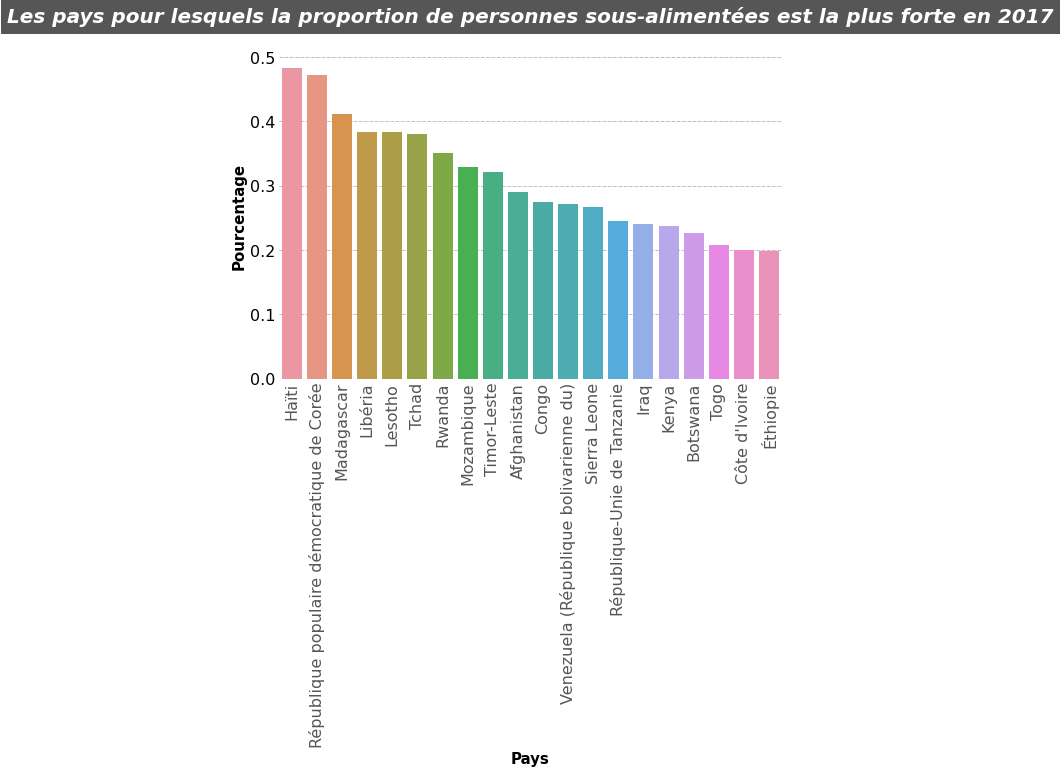

In [39]:
visual = top20_sous_nutrition.head(20)
fig,ax = plt.subplots(figsize=(9,6))
sns.barplot(x= visual.index.tolist() ,y='Proportion',data=visual, ci=95,ax=ax)
ax.set_title('Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017',backgroundcolor='#565656',
 fontsize=20, weight='bold',color='white',style='italic',loc='center',pad=30)
ax.tick_params(labelsize=16,length=0)
plt.box(False)
ax.yaxis.grid(linewidth=0.5,color='grey',linestyle='-.')
ax.set_axisbelow(True)
ax.set_xlabel('Pays',weight='bold',size=15)
ax.set_ylabel('Pourcentage',weight='bold',size=15)
plt.yticks(np.arange(0, 0.6, 0.1))
plt.xticks(rotation=90,color='#565656')
plt.show()

# <center><span style="color : #708090">**Les pays qui ont le plus bénéficié de l'aide depuis 2013**</span>

* ### <span style="color : #20B2AA">***Regroupement et classement des données***</span>

In [40]:
top20_aide_alimentaire_depuis_2013_df  = aide_alimentaire_depuis_2013_df.sort_values('Quantité donnée', ascending=False)
top20_aide_alimentaire_depuis_2013_df['Quantité donnée'] = top20_aide_alimentaire_depuis_2013_df['Quantité donnée'].astype(float).apply(lambda x: f'{x:,}')
top20_aide_alimentaire_depuis_2013_df.head(20)

,Quantité donnée
Pays,
République arabe syrienne,"1,858,943.0"
Éthiopie,"1,381,294.0"
Yémen,"1,206,484.0"
Soudan du Sud,"695,248.0"
Soudan,"669,784.0"
Kenya,"552,836.0"
Bangladesh,"348,188.0"
Somalie,"292,678.0"
République démocratique du Congo,"288,502.0"


# <center><span style="color : #708090">**Les pays avec le plus/le moins de disponibilité/habitant**</span>

* ### <span style="color : #20B2AA">***Top 10 pays avec plus de disponibilité alimentaire/habitant***</span>

In [41]:
top10_pays_dispo_alimentaire_df  = dispo_alimentaire_pays_df.sort_values("Disponibilité alimentaire (Kcal/personne/jour)",ascending=False)
top10_pays_dispo_alimentaire_df.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
Autriche,3770.0
Belgique,3737.0
Turquie,3708.0
États-Unis d'Amérique,3682.0
Israël,3610.0
Irlande,3602.0
Italie,3578.0
Luxembourg,3540.0
Égypte,3518.0


* ### <span style="color : #20B2AA">***Top 10 pays avec moins de disponibilité alimentaire/habitant***</span>

In [42]:
top10_pays_moins_dispo_alimentaire_df  = dispo_alimentaire_pays_df.sort_values("Disponibilité alimentaire (Kcal/personne/jour)", ascending=True)
top10_pays_moins_dispo_alimentaire_df.head(10)

,Disponibilité alimentaire (Kcal/personne/jour)
Pays,
République centrafricaine,1879.0
Zambie,1924.0
Madagascar,2056.0
Afghanistan,2087.0
Haïti,2089.0
République populaire démocratique de Corée,2093.0
Tchad,2109.0
Zimbabwe,2113.0
Ouganda,2126.0


# <center><span style="color : #708090">**Les pays qui semblent être le plus en difficulté, au niveau alimentaire**</span>

* ### <span style="color : #20B2AA">***Regroupement et classement des données***</span>

In [43]:
disponibilité_total_df = dispo_alimentaire_df[['Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité intérieure','Exportations','Nourriture','Aliments pour animaux','Pertes']].groupby(['Pays']).sum()
disponibilité_total_df.loc[:,"Exportations %"] = round((disponibilité_total_df['Exportations']/disponibilité_total_df['Disponibilité intérieure']),4)
disponibilité_total_df.loc[:,"Nourriture %"] = round((disponibilité_total_df['Nourriture']/disponibilité_total_df['Disponibilité intérieure']),4)
disponibilité_total_df.loc[:,"Aliments pour animaux %"] = round((disponibilité_total_df['Aliments pour animaux']/disponibilité_total_df['Disponibilité intérieure']),4)
disponibilité_total_df.loc[:,"Pertes %"] = round((disponibilité_total_df['Pertes']/disponibilité_total_df['Disponibilité intérieure']),4)
proportion_disponibilité_total_df = disponibilité_total_df[['Disponibilité alimentaire (Kcal/personne/jour)','Disponibilité intérieure','Exportations %','Nourriture %','Aliments pour animaux %','Pertes %']]

* ### <span style="color : #20B2AA">***Merge Proportion sous-nutrition et Proportion disponibilité alimentaire***</span>

In [44]:
merge_pays_plus_dificulte_df = pd.merge(merge_population_sousnutrition_df[['Proportion']], proportion_disponibilité_total_df, on='Pays', how='left')
merge_pays_plus_dificulte_df = merge_pays_plus_dificulte_df.rename(columns={'Proportion':'Proportion Sous-Nutrition'})
top_pays_plus_dificulte_df  = merge_pays_plus_dificulte_df.sort_values('Proportion Sous-Nutrition',ascending=False)
top_pays_plus_dificulte_df.head(10).style.format({'Proportion Sous-Nutrition': '{:.2%}','Disponibilité alimentaire (Kcal/personne/jour)':'{:.0f}','Disponibilité intérieure':'{:.0f}','Exportations %': '{:.2%}','Nourriture %': '{:.2%}','Aliments pour animaux %': '{:.2%}','Pertes %': '{:.2%}'})

,Proportion Sous-Nutrition,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité intérieure,Exportations %,Nourriture %,Aliments pour animaux %,Pertes %
Pays,,,,,,,
Haïti,48.26%,2089,6175,0.24%,66.41%,7.79%,11.00%
République populaire démocratique de Corée,47.19%,2093,14876,0.56%,76.80%,5.49%,7.17%
Madagascar,41.06%,2056,15216,1.55%,64.02%,5.53%,6.35%
Libéria,38.28%,2206,2002,1.70%,82.57%,1.75%,5.54%
Lesotho,38.25%,2528,966,3.31%,93.06%,0.10%,5.28%
Tchad,37.96%,2109,5304,0.00%,77.24%,1.96%,8.65%
Rwanda,35.06%,2224,10054,3.29%,92.23%,0.00%,4.33%
Mozambique,32.81%,2282,22023,1.90%,56.93%,7.81%,5.28%
Timor-Leste,32.17%,2129,447,5.15%,93.74%,2.01%,3.13%
